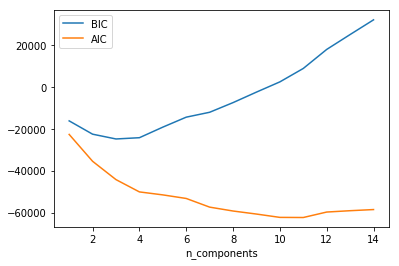

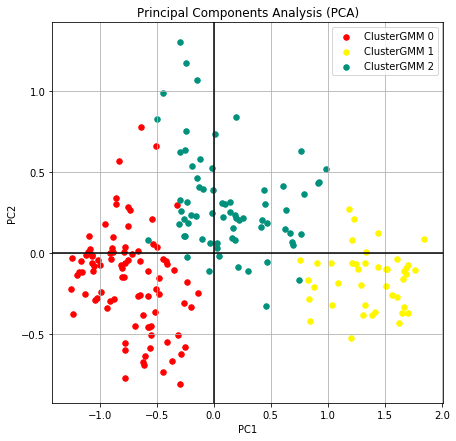

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.decomposition import PCA


data = pd.read_csv('../countries_dataset/FinalCountryDatasetCombinedNoMissing.csv')
col = data['country']
data.drop('country', axis = 1, inplace = True)


features = list(data.columns)
X = data[features]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_array = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)


#Find Number of components using aic and bic
aic = []
bic = []
for n in np.arange(1,15):
    gmm = GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled)
    aic.append(gmm.aic(X_scaled))
    bic.append(gmm.bic(X_scaled))


plt.plot(np.arange(1,15), bic, label='BIC')
plt.plot(np.arange(1,15), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')



#GMM using 3 components from BIC
gmm = GaussianMixture(n_components=3, random_state=5)
gmm.fit(X_scaled)

pca = PCA(n_components=2, random_state=0)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
df_plot = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])


# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
X_scaled['ClusterGMM'] = y_cluster_gmm

df_plot['ClusterGMM'] = y_cluster_gmm

fig, ax = plt.subplots(figsize = (7,7))
cmap = mpl.cm.get_cmap('prism')
for i, cluster in df_plot.groupby('ClusterGMM'):
    cluster.plot(ax = ax,
                kind = 'scatter', 
                x = 'PC1', y = 'PC2',
                color = cmap(i*7),
                label = "%s %i" % ('ClusterGMM', i), 
                s=30)
ax.grid()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title("Principal Components Analysis (PCA)")



data.insert(0, 'country', col)
data['ClusterGMM'] = y_cluster_gmm

df = data[data['ClusterGMM'] == 0]
df.to_csv('gmm_0_covid.csv')

df = data[data['ClusterGMM'] == 1]
df.to_csv('gmm_1_covid.csv')

df = data[data['ClusterGMM'] == 2]
df.to_csv('gmm_2_covid.csv')